# **Positional Encoding**

In [1]:
import torch 
import torch.nn as nn

In [2]:
max_seq_length = 10
d_model = 6

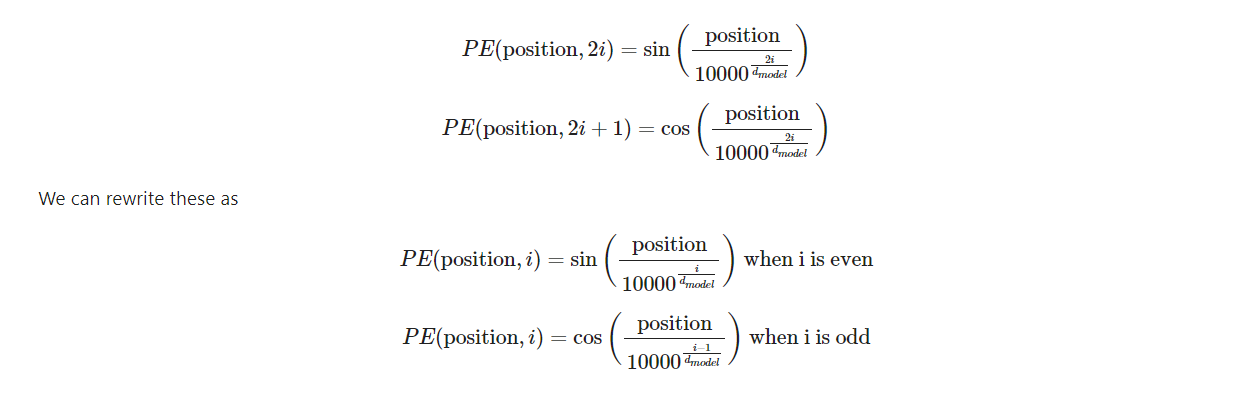

**Notes**

* i = dimension index
* d_model = embedding_length
* pos = position of word in seq

**(Q)Why sin and cos?**
* Periodicity 
* constrained values
* easy to extrapolate for long sequences

In [14]:
even_i = torch.arange(0, d_model, 2).float()
odd_i = torch.arange(1, d_model, 2).float()

print(f"Even_i : {even_i}")
print(f"Odd_i : {odd_i}")

Even_i : tensor([0., 2., 4.])
Odd_i : tensor([1., 3., 5.])


In [15]:
even_denominator = torch.pow(10000, even_i/d_model)
odd_denominator = torch.pow(10000, (odd_i-1)/d_model)

print(f"Even_denominator : {even_denominator}")
print(f"Odd_denominator : {odd_denominator}")



Even_denominator : tensor([  1.0000,  21.5443, 464.1590])
Odd_denominator : tensor([  1.0000,  21.5443, 464.1590])


In [17]:
position = torch.arange(max_seq_length, dtype = torch.float).reshape(max_seq_length, 1)
print(f"Position is :\n {position}")

Position is :
 tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])


In [12]:
even_PE = torch.sin(position / even_denominator)
odd_PE = torch.cos(position / odd_denominator)

print(f"Even Postional Encoding :\n {even_PE}")
print(f"Size of Even positional encoding is : {even_PE.size()}")
print(f"Odd Postional Encoding :\n {odd_PE}")
print(f"Size of Odd positional encoding is : {odd_PE.size()}")

Even Postional Encoding :
 tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194]])
Size of Even positional encoding is : torch.Size([10, 3])
Odd Postional Encoding :
 tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])
Size of Odd positional encoding is : torch.Size([10, 3])


In [20]:
stacked = torch.stack([even_PE, odd_PE], dim=2)
Positional_Encoding = torch.flatten(stacked, start_dim=1, end_dim=2)

print(f"Size of stacked : {stacked.shape}")
print(f"Positional Encoding : \n{Positional_Encoding}")

Size of stacked : torch.Size([10, 3, 2])
Positional Encoding : 
tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])


# **Class**

In [21]:
import torch 
import torch.nn as nn

class Positional_Encoding(nn.Module) :

  def __init__(self, d_model, max_seq_length) :
    super().__init__
    self.d_model = d_model
    self.max_seq_length = max_seq_length

  def forward(self) :
    even_i = torch.arange(0, self.d_model, 2).float()
    odd_i = torch.arange(1, self.d_model, 2).float()
    even_denominator = torch.pow(10000, even_i/self.d_model)
    odd_denominator = torch.pow(10000, (odd_i-1)/self.d_model)
    position = torch.arange(self.max_seq_length, dtype=float).reshape(self.max_seq_length, 1)
    even_PE = torch.sin(position/even_denominator)
    odd_PE = torch.cos(position/odd_denominator)
    stacked = torch.stack([even_PE, odd_PE], dim=2)
    Positional_Encoding = torch.flatten(stacked, start_dim=1, end_dim=2)

    return Positional_Encoding


In [23]:
PE = Positional_Encoding(d_model=6, max_seq_length=10)
PE.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]],
       dtype=torch.float64)